## Theory Only Course

### Predicting grade from predicted externals marks (FAT) based on Internals (CAT1, CAT2, DA1, DA2, DA3)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
RFR = RandomForestRegressor(max_depth=5, random_state=0)

In [74]:
# reading the dataset
student_data = pd.read_csv("./thelab.csv")
# student_data = student_data.sample(frac=1)

# taking input for class of 70 - for realistic emulation of class grades distribution
test_data = pd.read_csv("testInternals.csv")
student_data.head()

,CAT1,CAT2,DA1,DA2,DA3,FAT,LAB1,LAB2,LAB3,LAB4,LAB5,LAB6,LFAT
0,8,10,9,7,10,30,9,9,10,9,8,7,31
1,10,8,8,7,7,33,8,8,7,8,10,10,32
2,9,5,9,10,9,38,10,7,9,7,10,7,30
3,8,5,7,9,7,55,7,9,7,10,10,10,30
4,6,10,9,9,9,53,7,8,7,9,9,7,31


In [75]:
# extract the required output and input variables
X_train = student_data[['CAT1', 'CAT2', "DA1", "DA2", "DA3"]]
y_train = student_data['FAT']
print(X_train.shape, y_train.shape)

(2000, 5) (2000,)


In [76]:
# fitting the model
RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [77]:
# computing the predictions using testing data and comparing the outputs

X_test = test_data[['CAT1', 'CAT2', "DA1", "DA2", "DA3"]]
y_test = test_data['FAT']

y_pred_fat = RFR.predict(X_test)
y_actual = np.array(y_test)

print(np.concatenate((y_pred_fat.reshape(len(y_pred_fat), 1), y_actual.reshape(len(y_actual), 1)),1))

[[45.2459474  31.        ]
 [50.04739126 39.        ]
 [44.47216076 33.        ]
 [47.68288591 47.        ]
 [48.15624305 41.        ]
 [47.31836296 41.        ]
 [48.87624401 53.        ]
 [67.51528112 77.        ]
 [66.79867852 59.        ]
 [68.12824376 69.        ]
 [67.88313491 64.        ]
 [69.19290119 61.        ]
 [67.5276304  69.        ]
 [67.46968479 73.        ]
 [67.35954426 74.        ]
 [67.81245174 60.        ]
 [67.28964421 70.        ]
 [67.24517883 60.        ]
 [67.46706229 68.        ]
 [67.17070857 75.        ]
 [68.81493533 66.        ]
 [67.26267107 67.        ]
 [67.6935752  60.        ]
 [67.49462489 61.        ]
 [67.28464994 67.        ]
 [67.45426033 79.        ]
 [67.52494427 70.        ]
 [67.39685535 78.        ]
 [68.71366794 72.        ]
 [67.36382104 68.        ]
 [67.64124998 74.        ]
 [67.06430854 70.        ]
 [67.50902926 57.        ]
 [67.37239977 59.        ]
 [67.52108791 58.        ]
 [67.61449462 58.        ]
 [67.93102516 59.        ]
 

In [78]:
# training accuracy
RFR.score(X_train, y_train)

0.7244464197268923

In [79]:
# testing accuracy
RFR.score(X_test, y_test)

0.7409613976760021

In [80]:
internal = np.empty(len(y_pred_fat), dtype=object)
counter = 0

for i in X_test.index:
  internal[counter]=round((15/50)*X_test['CAT1'][i],2) + round((15/50)*X_test['CAT2'][i],2) + X_test['DA1'][i] + X_test['DA2'][i] + X_test['DA3'][i]
  counter += 1

print(internal)
totPred = internal + (0.4)*y_pred_fat

[31.8 27.0 29.4 29.2 30.9 31.5 30.1 37.8 32.6 33.6 36.6 34.7 35.5 36.6
 37.2 36.2 34.8 42.2 38.4 44.7 42.6 43.2 43.2 40.8 39.7 42.1 39.5 42.7
 41.0 41.0 41.2 38.2 40.4 37.2 42.1 41.3 38.5 38.5 47.0 46.3 45.2 47.3
 44.6 48.5 52.4 47.6 49.8 47.3 46.1 45.7 49.4 46.3 47.7 47.2 47.3 49.0
 45.2 43.1 50.9 49.8 49.4 53.6 50.2 54.9 52.2 46.6 51.0 49.1 52.4 54.7]


In [81]:
print(totPred)

[49.898378961347746 47.01895650456436 47.18886430456307 48.27315436567383
 50.16249721854988 50.42734518419559 49.65049760267161 64.80611244834303
 59.319471409293726 60.851297502581616 63.75325396334941 62.37716047554703
 62.511052160526596 63.58787391661127 64.14381770429692 63.32498069512399
 61.71585768591353 69.09807153382977 65.38682491781886 71.56828342799388
 70.12597413365683 70.10506842742214 70.27743007945912 67.79784995429759
 66.61385997531539 69.08170413149108 66.50997770990098 69.65874214034257
 68.48546717441651 67.945528415599 68.25649999022272 65.02572341506074
 67.40361170549507 64.14895990957574 69.10843516408009 68.34579784767168
 65.67241006464096 65.45178639967187 73.86227496000481 72.6316005165178
 72.24568231508606 74.16106808167949 71.51415237555595 75.12153680278652
 79.22722658536432 74.77375634027885 77.22010833368398 74.17673229374162
 72.86897732318567 72.58091993237348 76.2272921894821 73.35186530335892
 74.43619362481726 73.94340740191156 74.86190108989

In [83]:
# computing grades based on y_pred
grade = np.empty(len(y_pred_fat), dtype = object)
Mean=np.mean(totPred)
sd=np.std(totPred)
print("SD:", sd)
print("Mean:", Mean)

for i in range(0,len(totPred)):
  if internal[i] < 30 and y_pred_fat[i] < 40:
    grade[i] = 'F'
  else:
    if totPred[i]>= Mean + 1.5*sd:
      grade[i]='S'
    elif totPred[i]>=Mean + 0.5*sd and totPred[i] < Mean + 1.5*sd:
      grade[i]='A'
    elif totPred[i] >= Mean - 0.5*sd and totPred[i] < Mean + 0.5*sd:
      grade[i]='B'
    elif totPred[i]>= Mean - 1.0*sd and totPred[i] < Mean - 0.5*sd:
      grade[i]='C'
    elif totPred[i] >= Mean - 1.5*sd and totPred[i] < Mean - 1.0*sd:
      grade[i]='D'
    elif totPred[i] >= Mean - 2.0*sd and totPred[i] < Mean - 1.5*sd:
      grade[i]='E'
    elif totPred[i] < Mean - 2.0*sd:
      grade[i]='F'

print(grade)
print(np.unique(grade, return_counts=True))

SD: 10.277043384117269
Mean: 70.07896376767796
['E' 'F' 'F' 'F' 'E' 'E' 'E' 'C' 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'B' 'B' 'B'
 'B' 'A' 'B' 'B' 'A' 'A' 'A' 'S' 'S' 'S' 'S' 'A' 'S' 'A' 'S' 'S']
(array(['A', 'B', 'C', 'D', 'E', 'F', 'S'], dtype=object), array([ 9, 36, 10,  1,  4,  3,  7], dtype=int64))


## Theory + Lab

### Predicting Grade using internals (DA1, DA2, DA3) and Lab Marks (Internals + Predicted Lab Fat marks)

In [101]:
# reading the dataset
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
theory_lab = pd.read_csv("./thelab.csv")
# student_data = student_data.sample(frac=1)

# taking input for class of 70 - for realistic emulation of class grades distribution
theory_lab_test = pd.read_csv("./thelabtest.csv")
theory_lab_test.head()

,CAT1,CAT2,DA1,DA2,DA3,FAT,LAB1,LAB2,LAB3,LAB4,LAB5,LAB6,LFAT
0,7,10,9,7,7,34,8,7,7,9,8,7,32
1,7,8,7,10,9,30,8,9,9,10,10,10,32
2,8,10,7,8,8,35,8,10,10,7,10,10,32
3,8,5,8,9,9,41,9,7,7,10,10,8,31
4,5,5,7,8,8,40,7,10,7,8,8,9,32


In [102]:
# extract the required output and input variables
X_train= theory_lab[["LAB1", "LAB2", "LAB3", "LAB4", "LAB5", "LAB6"]]
y_train = theory_lab["LFAT"]
print(X_train.shape, y_train.shape)

(2000, 6) (2000,)


In [103]:
# fitting the model
RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [104]:
# computing the predictions using testing data and comparing the outputs

X_test= theory_lab_test[["LAB1", "LAB2", "LAB3", "LAB4", "LAB5", "LAB6"]]
y_test = theory_lab_test["LFAT"]

y_pred_lab = RFR.predict(X_test)
y_actual = np.array(y_test)

print(np.concatenate((y_pred_lab.reshape(len(y_pred_lab), 1), y_actual.reshape(len(y_actual), 1)),1))

[[34.59470476 32.        ]
 [35.10400167 32.        ]
 [34.79433108 32.        ]
 [34.94525229 31.        ]
 [34.39782332 32.        ]
 [34.96764233 31.        ]
 [34.69237379 32.        ]
 [34.93831162 32.        ]
 [34.97627325 32.        ]
 [35.24902197 30.        ]
 [35.67861924 31.        ]
 [35.06148419 30.        ]
 [35.37774674 31.        ]
 [35.20068036 30.        ]
 [34.97343094 35.        ]
 [34.59544572 36.        ]
 [35.12339374 36.        ]
 [35.1369547  33.        ]
 [34.37501756 36.        ]
 [35.12994006 37.        ]
 [34.02150646 35.        ]
 [34.90563544 35.        ]
 [35.63017974 37.        ]
 [35.44187098 36.        ]
 [34.76453905 37.        ]
 [34.85306609 36.        ]
 [34.61827372 37.        ]
 [35.15685455 35.        ]
 [34.98436896 34.        ]
 [34.83040171 37.        ]
 [34.99832837 34.        ]
 [35.3016673  33.        ]
 [35.12175865 36.        ]
 [35.1399976  35.        ]
 [35.10181845 35.        ]
 [35.24227936 33.        ]
 [35.71370038 36.        ]
 

In [111]:
# training accuracy
print(RFR.score(X_train, y_train))
# accuracy_score(y_test, y_pred)

0.0714087756932793


In [109]:
print(np.sqrt(mean_squared_error(y_actual, y_pred_lab)))
# print(r2_score(y_actual, y_pred_lab))

2.6892556761973814


In [107]:
print(RFR.score(X_test, y_test))

0.015658708074686944


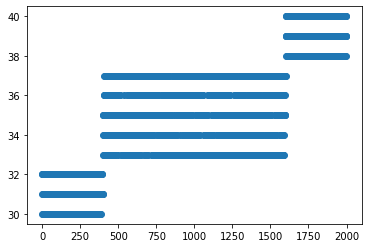

In [108]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(0,len(y_train)), y_train)

In [112]:
#Theory+Lab

# thetot=internal+(0.4*fat)
labtot= X_test.sum(axis=1) + y_pred_lab
tot=(0.75*totPred)+(0.25*labtot)
Mean=np.mean(tot)
sd=np.std(tot)
grade = np.empty(len(y_pred_lab), dtype=object)
for i in range(0,len(y_pred_lab)):
  if y_pred_fat[i]<40 or tot[i]<50:
    grade[i]='F'
  else:
    if tot[i]>= Mean + 1.5*sd:
      grade[i]='S'
    elif tot[i]>=Mean + 0.5*sd and tot[i] < Mean + 1.5*sd:
      grade[i]='A'
    elif tot[i] >= Mean - 0.5*sd and tot[i] < Mean + 0.5*sd:
      grade[i]='B'
    elif tot[i ]>= Mean - 1.0*sd and tot[i] < Mean - 0.5*sd:
      grade[i]='C'
    elif tot[i] >= Mean - 1.5*sd and tot[i] < Mean - 1.0*sd:
      grade[i]='D'
    elif tot[i] >= Mean - 2.0*sd and tot[i] < Mean - 1.5*sd:
      grade[i]='E'
    elif tot[i] < Mean - 2.0*sd:
      grade[i]='F'

print(grade)
print(np.unique(grade, return_counts=True))

['F' 'F' 'F' 'F' 'E' 'E' 'F' 'B' 'D' 'C' 'C' 'C' 'C' 'B' 'C' 'C' 'C' 'B'
 'C' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'B' 'B' 'B'
 'B' 'A' 'B' 'B' 'A' 'A' 'A' 'S' 'S' 'S' 'S' 'A' 'S' 'A' 'S' 'S']
(array(['A', 'B', 'C', 'D', 'E', 'F', 'S'], dtype=object), array([10, 36,  9,  1,  2,  5,  7], dtype=int64))


## Theory + Lab + J Comp

### Predicting Grade using internals (DA1, DA2, DA3) and Lab Marks (Internals + Predicted Lab Fat marks)

In [152]:
# reading the dataset
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
theory_lab_j = pd.read_csv("./TLJ.csv")
# student_data = student_data.sample(frac=1)

# taking input for class of 70 - for realistic emulation of class grades distribution
theory_lab_j_test = pd.read_csv("./TLJtest.csv")
theory_lab_j_test.head()

,CAT1,CAT2,DA1,DA2,DA3,FAT,LAB1,LAB2,LAB3,LAB4,LAB5,LAB6,LFAT,REV1,REV2,REV3
0,10,8,9,9,10,30,7,8,9,8,9,8,32,20,27,45
1,5,5,10,7,8,30,10,9,9,8,8,7,30,17,26,43
2,8,10,9,7,8,38,8,10,7,7,9,9,31,19,28,43
3,7,10,9,9,10,45,7,10,9,8,7,8,32,18,30,46
4,8,7,8,10,8,50,10,10,8,7,7,7,31,20,27,43


In [151]:
# extract the required output and input variables
X_train= theory_lab_j[["REV1", "REV2"]]
y_train = theory_lab_j["REV3"]
print(X_train.shape, y_train.shape)

(2000, 2) (2000,)


In [150]:
# fitting the model
RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [149]:
# computing the predictions using testing data and comparing the outputs

X_test= theory_lab_j_test[["REV1", "REV2"]]
y_test = theory_lab_j_test["REV3"]

y_pred_J = RFR.predict(X_test)
y_actual = np.array(y_test)

print(np.concatenate((y_pred_J.reshape(len(y_pred_J), 1), y_actual.reshape(len(y_actual), 1)),1))

[[46.99437631 45.        ]
 [47.13008905 43.        ]
 [47.29890057 43.        ]
 [47.12639243 46.        ]
 [46.99437631 43.        ]
 [46.99437631 44.        ]
 [47.13992955 44.        ]
 [46.99437631 48.        ]
 [47.36632732 47.        ]
 [46.94432586 48.        ]
 [47.43766657 48.        ]
 [47.27567769 48.        ]
 [47.27962489 47.        ]
 [47.15141732 47.        ]
 [47.09022779 47.        ]
 [47.13058128 47.        ]
 [47.10353893 48.        ]
 [46.99437631 48.        ]
 [47.19147352 48.        ]
 [47.50306206 47.        ]
 [47.2438549  48.        ]
 [47.11359799 47.        ]
 [47.13058128 47.        ]
 [47.27567769 48.        ]
 [47.07278924 48.        ]
 [47.18013998 47.        ]
 [47.2476624  48.        ]
 [47.38749321 48.        ]
 [47.27567769 48.        ]
 [47.13992955 48.        ]
 [47.43766657 48.        ]
 [47.27567769 48.        ]
 [47.12072342 47.        ]
 [47.31218351 47.        ]
 [47.28454811 48.        ]
 [47.27283142 48.        ]
 [47.13992955 48.        ]
 

In [147]:
# training accuracy
print(RFR.score(X_train, y_train))
# accuracy_score(y_test, y_pred)

0.014715164206335896


In [146]:
print(np.sqrt(mean_squared_error(y_actual, y_pred_J)))
# print(r2_score(y_actual, y_pred_lab))

1.1912452618574385


In [145]:
print(RFR.score(X_test, y_test))

0.042887840041403


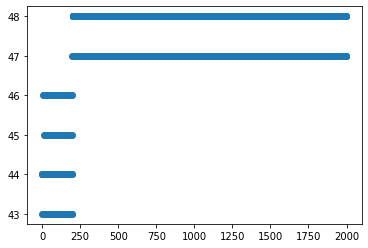

In [144]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(0,len(y_train)), y_train)

In [143]:
print(len(y_pred_J))

70


In [142]:
#Theory+Lab+J

# thetot=internal+(0.4*fat)
# labtot= X_test.sum(axis=1) + y_pred_lab
jcomp = X_test.sum(axis=1) + y_pred_J
tot=(0.5*totPred)+(0.25*labtot)+(0.25*jcomp)
Mean=np.mean(tot)
sd=np.std(tot)
grade = np.empty(len(y_pred_J), dtype=object)
for i in range(0,len(y_pred_J)):
  if y_pred_fat[i]<40 or tot[i]<50:
    grade[i]='F'
  else:
    if tot[i]>= Mean + 1.5*sd:
      grade[i]='S'
    elif tot[i]>=Mean + 0.5*sd and tot[i] < Mean + 1.5*sd:
      grade[i]='A'
    elif tot[i] >= Mean - 0.5*sd and tot[i] < Mean + 0.5*sd:
      grade[i]='B'
    elif tot[i ]>= Mean - 1.0*sd and tot[i] < Mean - 0.5*sd:
      grade[i]='C'
    elif tot[i] >= Mean - 1.5*sd and tot[i] < Mean - 1.0*sd:
      grade[i]='D'
    elif tot[i] >= Mean - 2.0*sd and tot[i] < Mean - 1.5*sd:
      grade[i]='E'
    elif tot[i] < Mean - 2.0*sd:
      grade[i]='F'

print(grade)
print(np.unique(grade, return_counts=True))

['F' 'F' 'E' 'E' 'E' 'E' 'F' 'B' 'D' 'C' 'C' 'C' 'C' 'B' 'C' 'C' 'C' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'B' 'B'
 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'A' 'A' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'B'
 'B' 'A' 'B' 'B' 'B' 'S' 'A' 'S' 'A' 'S' 'S' 'A' 'S' 'A' 'S' 'S']
(array(['A', 'B', 'C', 'D', 'E', 'F', 'S'], dtype=object), array([11, 35,  9,  1,  4,  3,  7], dtype=int64))
